## Collaborative rating using Movielens

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Data available from http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [2]:
path='data/ml-latest-small/'
#path='data/ml-latest/'

In [3]:
import pandas as pd

We're working with the movielens data, which contains one rating per row, like this:

In [4]:
ratings = pd.read_csv(path+'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Just for display purposes, let's read in the movie names too.

In [5]:
movies = pd.read_csv(path+'movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Data Exploration:
Who are the top (n) contributors? 
Which are the top (n) movies?

In [6]:
topn = 15
g=ratings.groupby('userId')['rating'].count()
topUsers=g.sort_values(ascending=False)[:topn]

g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False)[:topn]

Below prints movieId and name.

In [7]:
movie_names = movies.set_index('movieId')['title'].to_dict()
topMovieslist = iter(topMovies.index)
MostRatedmovie_names = pd.Series(movie_names, index=topMovieslist)
print("Movie id\t\tMovie Name\n")
print(MostRatedmovie_names[0:topn])

Movie id		Movie Name

356                                   Forrest Gump (1994)
296                                   Pulp Fiction (1994)
318                      Shawshank Redemption, The (1994)
593                      Silence of the Lambs, The (1991)
260             Star Wars: Episode IV - A New Hope (1977)
480                                  Jurassic Park (1993)
2571                                   Matrix, The (1999)
1                                        Toy Story (1995)
527                               Schindler's List (1993)
589                     Terminator 2: Judgment Day (1991)
1196    Star Wars: Episode V - The Empire Strikes Back...
110                                     Braveheart (1995)
1270                            Back to the Future (1985)
608                                          Fargo (1996)
1198    Raiders of the Lost Ark (Indiana Jones and the...
dtype: object


## Create subset for Excel

We create a crosstab of the most popular movies and top contributing (most movie-reviewer-addicted) users.
panda's `crosstab` computes a simple cross-tabulation of two (or more) factors. 
By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.
Here we pass the top users, top movies, and top ratings, with an aggregation function of `np.sum`

We can copy this table into Excel for creating a simple example. (This isn't necessary for any of the modeling below however.)

In [8]:
import numpy as np

In [9]:
top_r = ratings.join(topUsers, rsuffix='_r', how='inner', on='userId')
top_r = top_r.join(topMovies, rsuffix='_r', how='inner', on='movieId')

pd.crosstab(top_r.userId, top_r.movieId, top_r.rating, aggfunc=np.sum)

movieId,1,110,260,296,318,356,480,527,589,593,608,1196,1198,1270,2571
userId,,,,,,,,,,,,,,,
15,2.0,3.0,5.0,5.0,2.0,1.0,3.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0
30,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,3.0
73,5.0,4.0,4.5,5.0,5.0,5.0,4.0,5.0,3.0,4.5,4.0,5.0,5.0,5.0,4.5
212,3.0,5.0,4.0,4.0,4.5,4.0,3.0,5.0,3.0,4.0,NaN,NaN,3.0,3.0,5.0
213,3.0,2.5,5.0,NaN,NaN,2.0,5.0,NaN,4.0,2.5,2.0,5.0,3.0,3.0,4.0
294,4.0,3.0,4.0,NaN,3.0,4.0,4.0,4.0,3.0,NaN,NaN,4.0,4.5,4.0,4.5
311,3.0,3.0,4.0,3.0,4.5,5.0,4.5,5.0,4.5,2.0,4.0,3.0,4.5,4.5,4.0
380,4.0,5.0,4.0,5.0,4.0,5.0,4.0,NaN,4.0,5.0,4.0,4.0,NaN,3.0,5.0
452,3.5,4.0,4.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,2.0


## Collaborative filtering

Use `CollabFilterDataset.from_csv` to load the ratings file columns userid, movieId and rating, and return an object.

In [10]:
from fastai.column_data import CollabFilterDataset  #*

In [11]:
cf = CollabFilterDataset.from_csv(path, 'ratings.csv', 'userId', 'movieId', 'rating')

In [12]:
from fastai.dataset import get_cv_idxs

In [13]:
val_idxs = get_cv_idxs(len(ratings))   # validation indeces
n_factors = 50  # size of embedding matrix
bs = 64  # Batch size

In [14]:
from torch import optim

`get_learner`(self, n_factors, val_idxs, bs, **kwargs) returns a learner

In [15]:
learn = cf.get_learner(n_factors, val_idxs, bs, opt_fn=optim.Adam)

In [16]:
lr = 1e-2
wd = 2e-4   # Weight decay

`learn.fit` args: 
* lrs (float or list(float)): learning rate for the model
* n_cycle (int): number of cycles (or iterations) to fit the model for
* wds (float or list(float)): weight decay parameter(s).
* kwargs: other arguments

**NB: Below step takes hours about 3 hours to complete on the bigger dataset....Wall time: 2h 57min 14s
On the smaller dataset only 21 sec.**

In [17]:
%time lf = learn.fit(1e-2, 2, wds=wd, cycle_len=1, cycle_mult=2, use_wd_sched=True)

A Jupyter Widget

epoch      trn_loss   val_loss                                  
    0      0.846586   0.828998  
    1      0.656775   0.874402                                  
    2      0.328624   0.822791                                  

CPU times: user 22 s, sys: 3.31 s, total: 25.3 s
Wall time: 21 s


Let's compare to some benchmarks. Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on [RMSE](http://www.statisticshowto.com/rmse/) of 0.91. We'll need to take the square root of our loss, since we use plain MSE.

In [18]:
lf

[array([ 0.82279])]

In [19]:
from math import sqrt
sqrt(lf[0])

0.9070785486471569

Looking good - we've found a solution (same/better) than any of those benchmarks! Let's take a look at how the predictions compare to actuals for this model.

In [20]:
preds = learn.predict()

In [21]:
import seaborn as sns

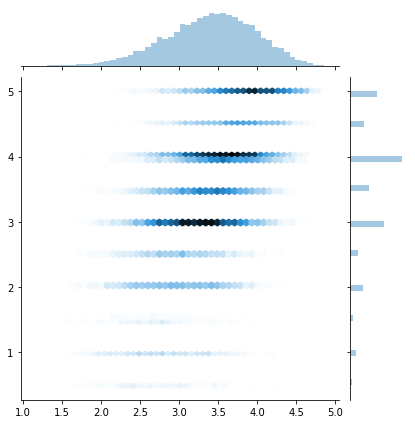

In [22]:
y=learn.data.val_y
sns.jointplot(preds, y, kind='hex', stat_func=None);

## Analyze results

### Movie bias

In [23]:
movie_names = movies.set_index('movieId')['title'].to_dict()
g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False).index.values[:3000]
topMovieIdx = np.array([cf.item2idx[o] for o in topMovies])

In [24]:
learn.models.model  # this is where the model is kept

EmbeddingDotBias(
  (u): Embedding(671, 50)
  (i): Embedding(9066, 50)
  (ub): Embedding(671, 1)
  (ib): Embedding(9066, 1)
)

In [25]:
m=learn.model; m.cuda()   # shortcut

EmbeddingDotBias(
  (u): Embedding(671, 50)
  (i): Embedding(9066, 50)
  (ub): Embedding(671, 1)
  (ib): Embedding(9066, 1)
)

One nice thing about Pytorch is that all layers can be invoked as if they were functions, e.g., m.ib() returns the movie bias.  

Pytorch Layers require Variables, not tensors, so they can compute the gradients... So we must pass Variables to models.
But now it was announced that in Pytorch 0.4 there will no longer need Variables, ie we can pass the tensors directly! 

First, we'll look at the movie bias term. Here, our input is the movie id (a single id), and the output is the movie bias (a single float).  Each movie has a single bias

In [26]:
from fastai.learner import V #*  V wraps it into a Variable

In [27]:
m.ib(V(topMovieIdx))  # passing a variable to the model for all the top indeces, returns a Variable of size 3000 with the biases

Variable containing:
 0.6117
 0.6722
 0.8807
   ⋮    
 0.2438
-0.0414
 0.1674
[torch.cuda.FloatTensor of size 3000x1 (GPU 0)]

In [28]:
from fastai.core import to_np  # to_np returns an np array

In [29]:
movie_bias = to_np(m.ib(V(topMovieIdx)))   #to_np is convert to numpy (fastai shortcut)

In [30]:
movie_bias    # now in numpy

array([[ 0.61175],
       [ 0.67223],
       [ 0.88067],
       ..., 
       [ 0.24382],
       [-0.04137],
       [ 0.16738]], dtype=float32)

JH approach, always use **numpy** unless you need GPU or a Variable.   Fastai libriary follows this approach, it does as much as possible in numpy.

Now grab each movie along with its bias term, with zip we get it into a list of tuples, 
so we can then use it in a list comprehension to iterate over all the the movies.
Lets get all the movie ratings.

In [31]:
movie_ratings = [(b[0], movie_names[i]) for i,b in zip(topMovies,movie_bias)]

Now we can look at the top and bottom rated movies. These ratings are corrected for different levels of reviewer sentiment, as well as different types of movies that different reviewers watch.

use lambda as the key sorter, and show the "top" (worst) 15 movies

In [32]:
sorted(movie_ratings, key=lambda o: o[0])[:15]

[(-0.66775638, 'Battlefield Earth (2000)'),
 (-0.49891901, 'Super Mario Bros. (1993)'),
 (-0.49282718, 'Speed 2: Cruise Control (1997)'),
 (-0.47543389, 'Scooby-Doo (2002)'),
 (-0.46324882, 'Inspector Gadget (1999)'),
 (-0.46022329, 'Avengers, The (1998)'),
 (-0.45051837, 'Anaconda (1997)'),
 (-0.44911736, 'Godzilla (1998)'),
 (-0.44344863, 'Jingle All the Way (1996)'),
 (-0.4389995, 'Mighty Morphin Power Rangers: The Movie (1995)'),
 (-0.43686545, 'Howard the Duck (1986)'),
 (-0.4315109, "Joe's Apartment (1996)"),
 (-0.425668, 'Wild Wild West (1999)'),
 (-0.42503527, 'Bio-Dome (1996)'),
 (-0.41617814, 'Batman & Robin (1997)')]

Equivalent to above (with lambda) but using the `itemgetter` operator.

In [33]:
from operator import itemgetter
sorted(movie_ratings, key=itemgetter(0))[:15]

[(-0.66775638, 'Battlefield Earth (2000)'),
 (-0.49891901, 'Super Mario Bros. (1993)'),
 (-0.49282718, 'Speed 2: Cruise Control (1997)'),
 (-0.47543389, 'Scooby-Doo (2002)'),
 (-0.46324882, 'Inspector Gadget (1999)'),
 (-0.46022329, 'Avengers, The (1998)'),
 (-0.45051837, 'Anaconda (1997)'),
 (-0.44911736, 'Godzilla (1998)'),
 (-0.44344863, 'Jingle All the Way (1996)'),
 (-0.4389995, 'Mighty Morphin Power Rangers: The Movie (1995)'),
 (-0.43686545, 'Howard the Duck (1986)'),
 (-0.4315109, "Joe's Apartment (1996)"),
 (-0.425668, 'Wild Wild West (1999)'),
 (-0.42503527, 'Bio-Dome (1996)'),
 (-0.41617814, 'Batman & Robin (1997)')]

Now reverse sorting to find the top rated movies

In [34]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(0.88067073, 'Shawshank Redemption, The (1994)'),
 (0.7377196, "Schindler's List (1993)"),
 (0.71958381, 'Godfather, The (1972)'),
 (0.67222995, 'Pulp Fiction (1994)'),
 (0.65572232, 'Silence of the Lambs, The (1991)'),
 (0.62673771, '12 Angry Men (1957)'),
 (0.62217748, 'To Kill a Mockingbird (1962)'),
 (0.62192857, 'Fargo (1996)'),
 (0.61174583, 'Forrest Gump (1994)'),
 (0.60877395, 'Usual Suspects, The (1995)'),
 (0.59297365, 'Memento (2000)'),
 (0.58929574, 'Fugitive, The (1993)'),
 (0.58286291, 'Lord of the Rings: The Return of the King, The (2003)'),
 (0.57973683, 'Matrix, The (1999)'),
 (0.56817353, 'American Beauty (1999)')]

### Embedding interpretation

We can now do the same thing to look at the embeddings. (m.i)

In [35]:
movie_emb = to_np(m.i(V(topMovieIdx)))
movie_emb.shape

(3000, 50)

Because it's hard to interpret 50 embeddings, we use [PCA](https://plot.ly/ipython-notebooks/principal-component-analysis/) to simplify them down to just 3 dimensional space.  Linear techniques work well for this type of embedings.
Turns out PCA is very similar to Singular Value Decomposition (SVD) which from time to time turns out in DL.

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)   # find 3 linear combinations that are different from each other as possible
movie_pca = pca.fit(movie_emb.T).components_   # grab the 3 components

In [37]:
movie_pca.shape

(3, 3000)

In [38]:
fac0 = movie_pca[0]
movie_comp = [(f, movie_names[i]) for f,i in zip(fac0, topMovies)]

We don't know apriori what is the interpretation for the latent factor identified by each component....
Here's the 1st component, the principal axis. So lets try to give it an interpretation....  JH called it 'easy watching' vs 'serious'.

In [39]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.067616299, 'Godfather: Part II, The (1974)'),
 (0.065105543, 'Godfather, The (1972)'),
 (0.052518327, 'On the Waterfront (1954)'),
 (0.052385021, 'Chinatown (1974)'),
 (0.052191772, 'Killing Fields, The (1984)'),
 (0.049472053, 'Crimes and Misdemeanors (1989)'),
 (0.048331697, 'Usual Suspects, The (1995)'),
 (0.048041694, 'Apocalypse Now (1979)'),
 (0.047883928, 'Goodfellas (1990)'),
 (0.04781992, 'Cool Hand Luke (1967)')]

In [40]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.043796394, 'Down Periscope (1996)'),
 (-0.042401556, 'Wedding Planner, The (2001)'),
 (-0.04174846, 'Avengers, The (1998)'),
 (-0.040294725, 'Catwoman (2004)'),
 (-0.039332353, 'Police Academy 5: Assignment: Miami Beach (1988)'),
 (-0.038602538, 'Bodyguard, The (1992)'),
 (-0.037890539, 'Home Alone 3 (1997)'),
 (-0.037468668, 'Karate Kid, Part III, The (1989)'),
 (-0.037455037, 'Police Academy: Mission to Moscow (1994)'),
 (-0.037367571, 'Bio-Dome (1996)')]

In [41]:
fac1 = movie_pca[1]
movie_comp = [(f, movie_names[i]) for f,i in zip(fac1, topMovies)]

Here's the $2nd$ component. More difficult to interpret...  To JH seems to be 'CGI' vs 'dialog driven'.

In [42]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.06231479, 'Patch Adams (1998)'),
 (0.060998224, 'Lock, Stock & Two Smoking Barrels (1998)'),
 (0.059026945, 'Dish, The (2001)'),
 (0.057384349, 'Sherlock Holmes (2009)'),
 (0.057264887, 'Shrek (2001)'),
 (0.056394089, 'Sweet Home Alabama (2002)'),
 (0.055416752, 'Good Will Hunting (1997)'),
 (0.053794339, '6th Day, The (2000)'),
 (0.053062029, 'Shawshank Redemption, The (1994)'),
 (0.052570451, 'Rosencrantz and Guildenstern Are Dead (1990)')]

In [43]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.048008207, 'Lost Highway (1997)'),
 (-0.04707912, 'Transformers: Dark of the Moon (2011)'),
 (-0.046909232, 'It Follows (2014)'),
 (-0.045716573, 'What Ever Happened to Baby Jane? (1962)'),
 (-0.045288913,
  'Garden of the Finzi-Continis, The (Giardino dei Finzi-Contini, Il) (1970)'),
 (-0.045037977, 'Night of the Hunter, The (1955)'),
 (-0.044861313, 'Open Your Eyes (Abre los ojos) (1997)'),
 (-0.041643389, 'Stepford Wives, The (1975)'),
 (-0.04159366, 'Ruby in Paradise (1993)'),
 (-0.040510535, '8 1/2 (8½) (1963)')]

We can draw a picture to see how various movies appear on the map of these components. This picture shows the first two components.

In [44]:
from matplotlib import pyplot as plt

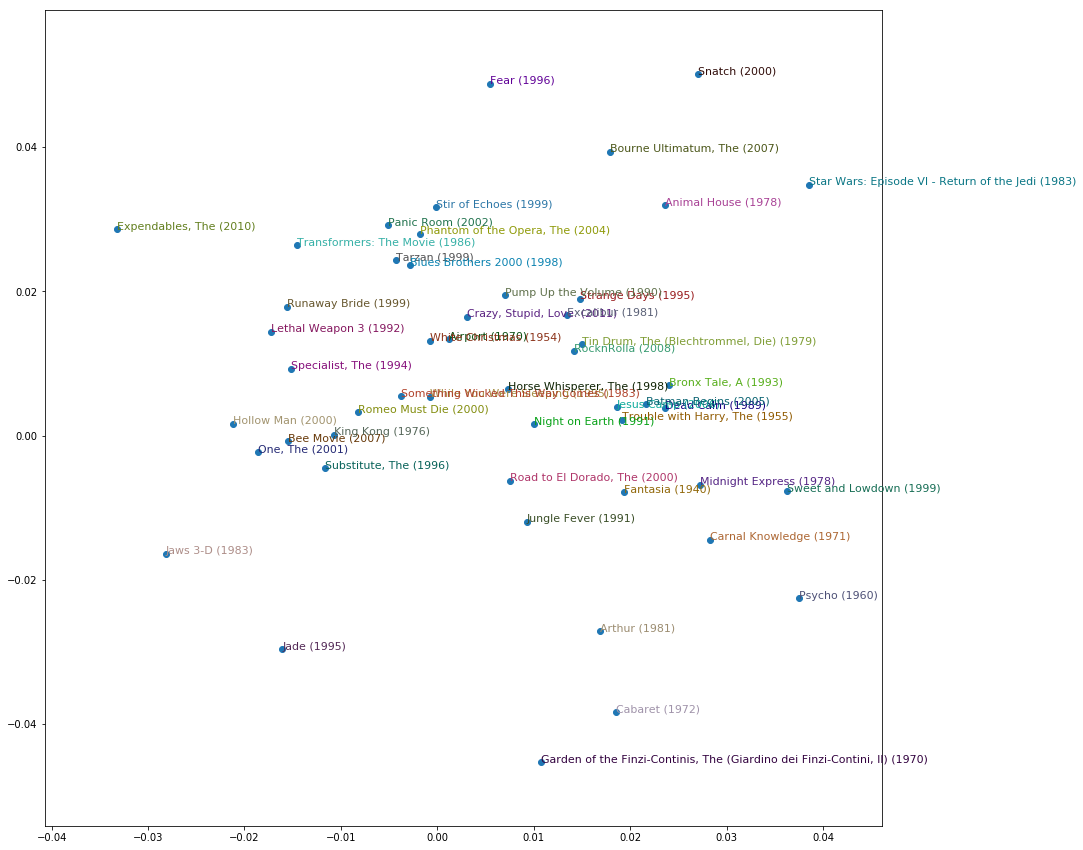

In [45]:
idxs = np.random.choice(len(topMovies), 50, replace=False)
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(topMovies[idxs], X, Y):
    plt.text(x,y,movie_names[i], color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

## Collab filtering from scratch

### Dot product example (aka inner product)

In [46]:
from fastai.core import T

In [47]:
a = T([[1.,2],[3,4]])
b = T([[2.,2],[10,10]])
a,b

(
  1  2
  3  4
 [torch.cuda.FloatTensor of size 2x2 (GPU 0)], 
   2   2
  10  10
 [torch.cuda.FloatTensor of size 2x2 (GPU 0)])

In [48]:
a*b   # element by element


  2   4
 30  40
[torch.cuda.FloatTensor of size 2x2 (GPU 0)]

In [49]:
(a*b).sum(1)   # the dot product


  6
 70
[torch.cuda.FloatTensor of size 2 (GPU 0)]

In [50]:
import torch.nn as nn

In [51]:
class DotProduct(nn.Module):
    def forward(self, u, m): return (u*m).sum(1)

In [52]:
model=DotProduct()

In [53]:
model(a,b)


  6
 70
[torch.cuda.FloatTensor of size 2 (GPU 0)]

### Dot product model

In [54]:
u_uniq = ratings.userId.unique()
user2idx = {o:i for i,o in enumerate(u_uniq)}
ratings.userId = ratings.userId.apply(lambda x: user2idx[x])

m_uniq = ratings.movieId.unique()
movie2idx = {o:i for i,o in enumerate(m_uniq)}
ratings.movieId = ratings.movieId.apply(lambda x: movie2idx[x])

n_users=int(ratings.userId.nunique())
n_movies=int(ratings.movieId.nunique())

In [55]:
class EmbeddingDot(nn.Module):
    def __init__(self, n_users, n_movies):
        super().__init__()
        self.u = nn.Embedding(n_users, n_factors)
        self.m = nn.Embedding(n_movies, n_factors)
        self.u.weight.data.uniform_(0,0.05)
        self.m.weight.data.uniform_(0,0.05)
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        u,m = self.u(users),self.m(movies)
        return (u*m).sum(1)

In [56]:
x = ratings.drop(['rating', 'timestamp'],axis=1)
y = ratings['rating'].astype(np.float32)

In [57]:
from fastai.column_data import ColumnarModelData

In [58]:
data = ColumnarModelData.from_data_frame(path, val_idxs, x, y, ['userId', 'movieId'], 64)

In [59]:
wd=1e-5
model = EmbeddingDot(n_users, n_movies).cuda()
opt = optim.SGD(model.parameters(), 1e-1, weight_decay=wd, momentum=0.9)

In [60]:
from fastai.learner import fit
from fastai.conv_learner import F 

In [61]:
%time fit(model, data, 3, opt, F.mse_loss)

A Jupyter Widget

epoch      trn_loss   val_loss                                 
    0      1.695763   1.639362  
    1      1.1038     1.293618                                 
    2      0.940097   1.222548                                  

CPU times: user 16.1 s, sys: 3.08 s, total: 19.2 s
Wall time: 15.2 s


[array([ 1.22255])]

In [63]:
from fastai.layer_optimizer import set_lrs
set_lrs(opt, 0.01)

In [64]:
fit(model, data, 3, opt, F.mse_loss)

A Jupyter Widget

epoch      trn_loss   val_loss                                  
    0      0.697484   1.147222  
    1      0.667045   1.135437                                  
    2      0.676045   1.129493                                  



[array([ 1.12949])]

### Bias

In [65]:
min_rating,max_rating = ratings.rating.min(),ratings.rating.max()
min_rating,max_rating

(0.5, 5.0)

In [66]:
def get_emb(ni,nf):
    e = nn.Embedding(ni, nf)
    e.weight.data.uniform_(-0.01,0.01)
    return e

class EmbeddingDotBias(nn.Module):
    def __init__(self, n_users, n_movies):
        super().__init__()
        (self.u, self.m, self.ub, self.mb) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_movies, n_factors), (n_users,1), (n_movies,1)
        ]]
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        um = (self.u(users)* self.m(movies)).sum(1)
        res = um + self.ub(users).squeeze() + self.mb(movies).squeeze()
        res = F.sigmoid(res) * (max_rating-min_rating) + min_rating
        return res

In [67]:
wd=2e-4
model = EmbeddingDotBias(cf.n_users, cf.n_items).cuda()
opt = optim.SGD(model.parameters(), 1e-1, weight_decay=wd, momentum=0.9)

In [68]:
fit(model, data, 3, opt, F.mse_loss)

A Jupyter Widget

epoch      trn_loss   val_loss                                  
    0      0.865598   0.837721  
    1      0.79957    0.817827                                  
    2      0.816777   0.807309                                  



[array([ 0.80731])]

In [69]:
from fastai.layer_optimizer import set_lrs

In [70]:
set_lrs(opt, 1e-2)

In [71]:
%time fit(model, data, 3, opt, F.mse_loss)

A Jupyter Widget

epoch      trn_loss   val_loss                                  
    0      0.751858   0.801746  
    1      0.761123   0.800683                                  
    2      0.769379   0.80029                                   

CPU times: user 19.8 s, sys: 3.57 s, total: 23.4 s
Wall time: 18.8 s


[array([ 0.80029])]

### Mini net

nn.Linear already includes a bias

In [72]:
class EmbeddingNet(nn.Module):
    def __init__(self, n_users, n_movies, nh=10, p1=0.05, p2=0.5):
        super().__init__()
        (self.u, self.m) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_movies, n_factors)]]
        self.lin1 = nn.Linear(n_factors*2, nh)
        self.lin2 = nn.Linear(nh, 1)
        self.drop1 = nn.Dropout(p1)
        self.drop2 = nn.Dropout(p2)
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        x = self.drop1(torch.cat([self.u(users),self.m(movies)], dim=1))
        x = self.drop2(F.relu(self.lin1(x)))
        return F.sigmoid(self.lin2(x)) * (max_rating-min_rating+1) + min_rating-0.5

In [73]:
wd=1e-5
model = EmbeddingNet(n_users, n_movies).cuda()
opt = optim.Adam(model.parameters(), 1e-3, weight_decay=wd)

In [77]:
import torch

In [78]:
%time fit(model, data, 3, opt, F.mse_loss)

A Jupyter Widget

epoch      trn_loss   val_loss                                  
    0      0.871969   0.813698  
    1      0.806792   0.794962                                  
    2      0.810496   0.790315                                  

CPU times: user 23.4 s, sys: 3.52 s, total: 26.9 s
Wall time: 22 s


[array([ 0.79032])]

In [79]:
set_lrs(opt, 1e-3)

In [80]:
%time fit(model, data, 3, opt, F.mse_loss)

A Jupyter Widget

epoch      trn_loss   val_loss                                  
    0      0.783943   0.788537  
    1      0.797234   0.787936                                  
    2      0.791812   0.787582                                  



[array([ 0.78758])]

In [ ]:
# END